1:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=1, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=8, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=16, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=32, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=64, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=32, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=16, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=8, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

_, H, W, C, A = caps_deconv0.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(caps_deconv0)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction

def shared_decoder(mask_layer):
    recon_remove_dim = layers.Reshape((H.value, W.value, A.value))(mask_layer)

    out_recon = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='out_recon')(recon_remove_dim)

    return out_recon

''''''

model = models.Model(inputs=x, outputs=out_seg)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

2:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=1, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=8, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=16, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=32, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=64, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=32, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=16, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=8, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

_, H, W, C, A = caps_deconv0.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(caps_deconv0)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

3:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=1, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=8, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=16, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=32, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=64, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=32, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=16, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=8, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

masked = Mask()(caps_deconv0)

_, H, W, C, A = masked.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(masked)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_30[0][0]                   
__________________________________________________________________________________________________
reshape_26 (Reshape)            (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_26[0][0]                 
__________________________________________________________________________________________________
caps_conv2

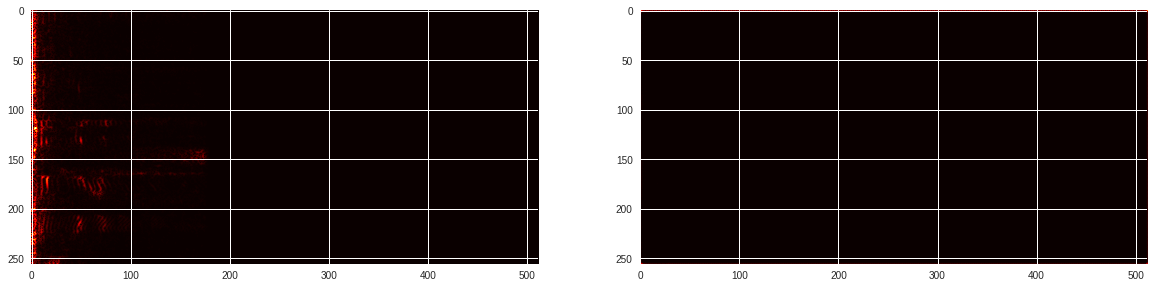

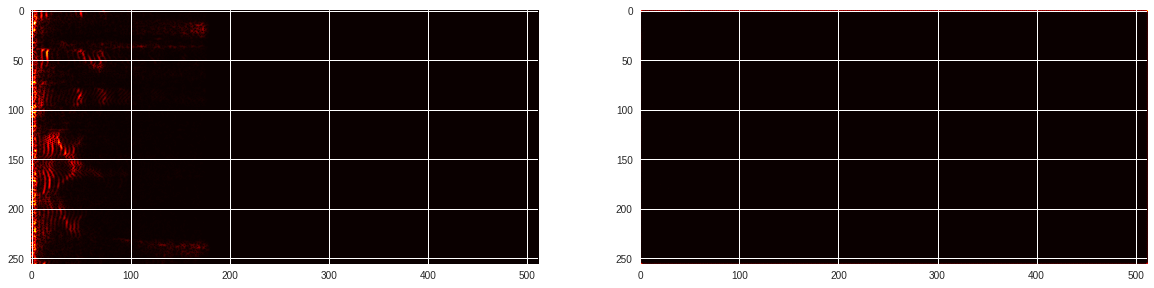

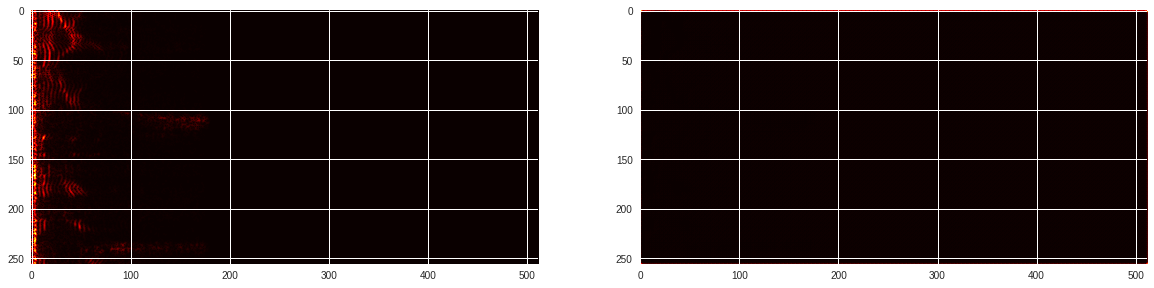

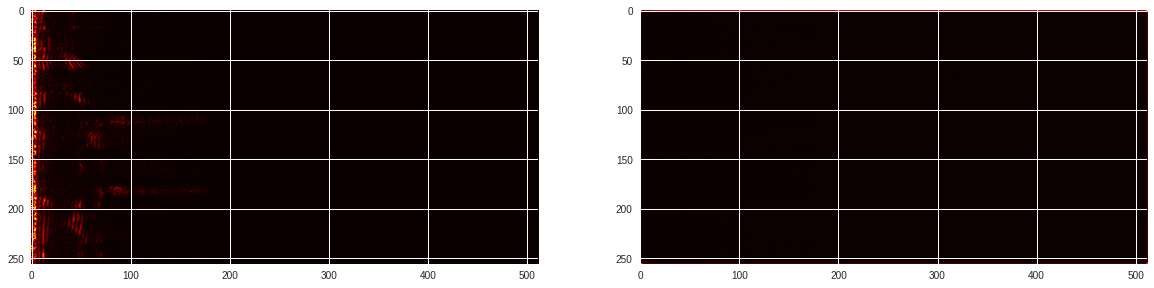

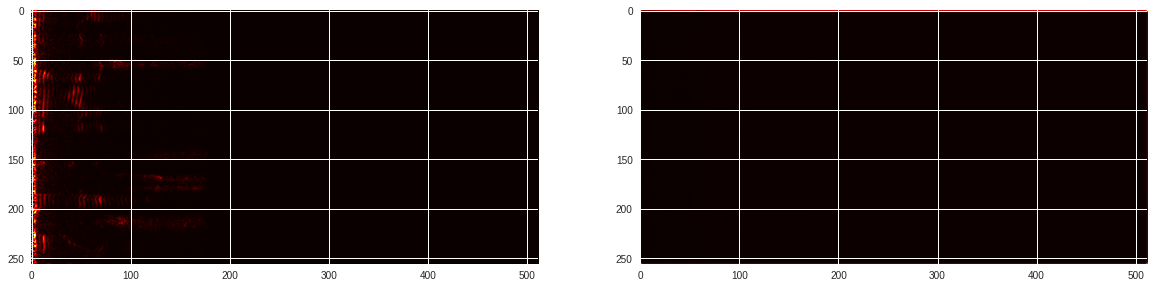

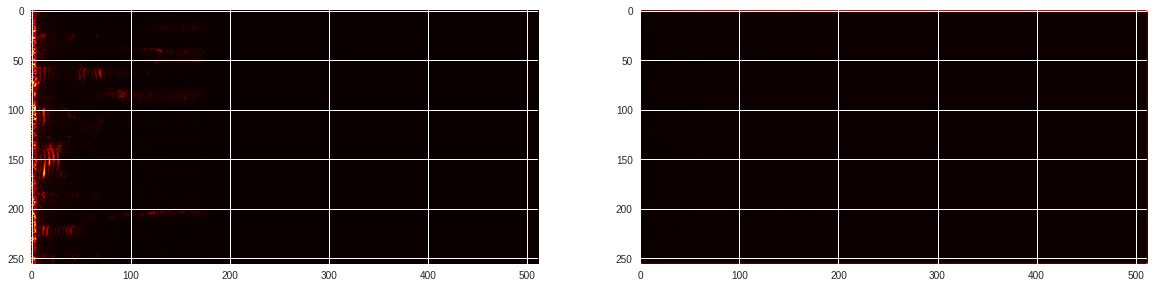

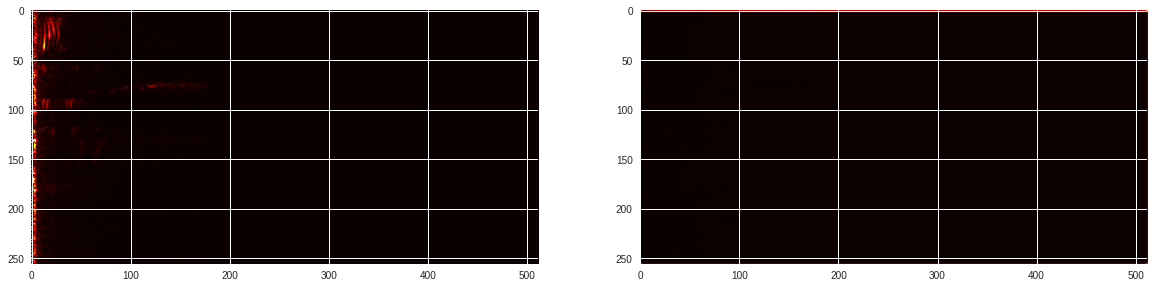

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

4:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

#masked = Mask()(caps_deconv0)

_, H, W, C, A = caps_deconv0.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(caps_deconv0)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_34[0][0]                   
__________________________________________________________________________________________________
reshape_30 (Reshape)            (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_30[0][0]                 
__________________________________________________________________________________________________
caps_conv2

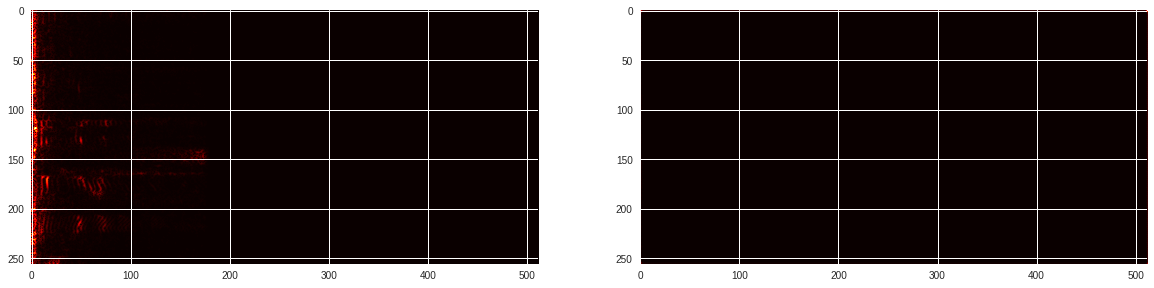

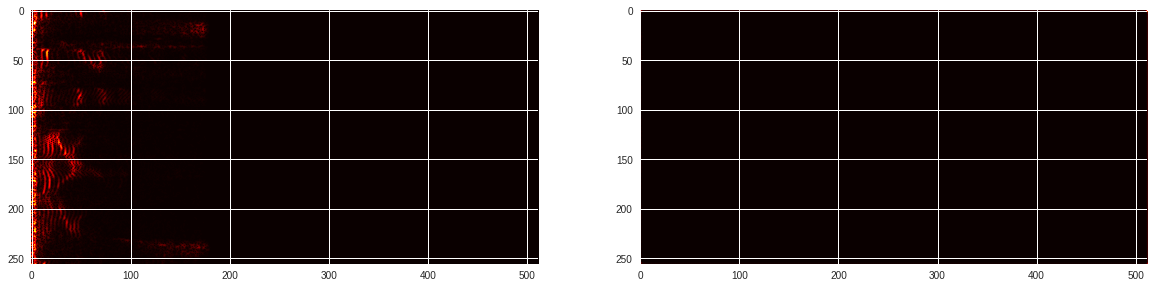

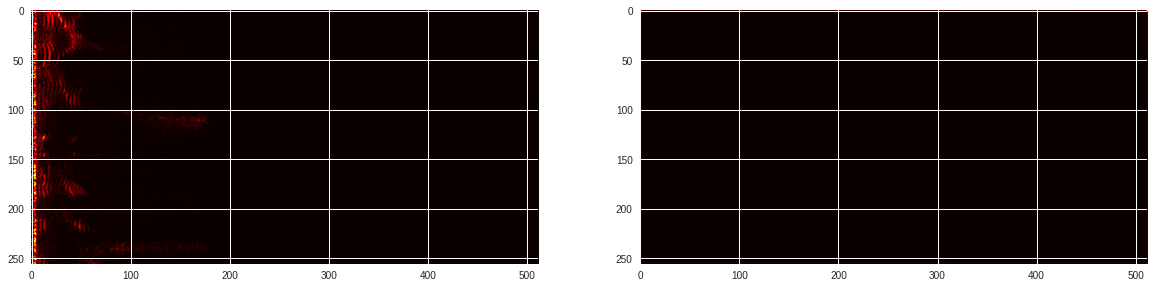

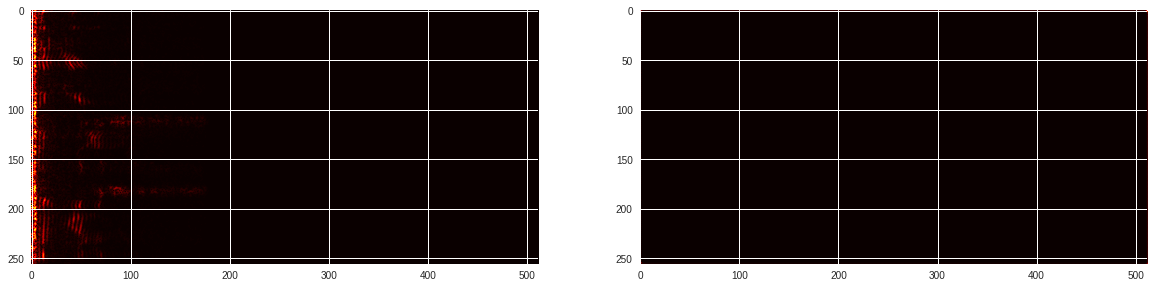

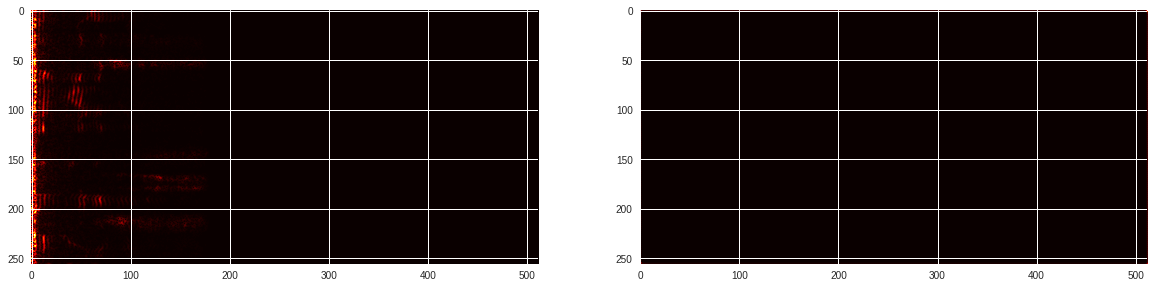

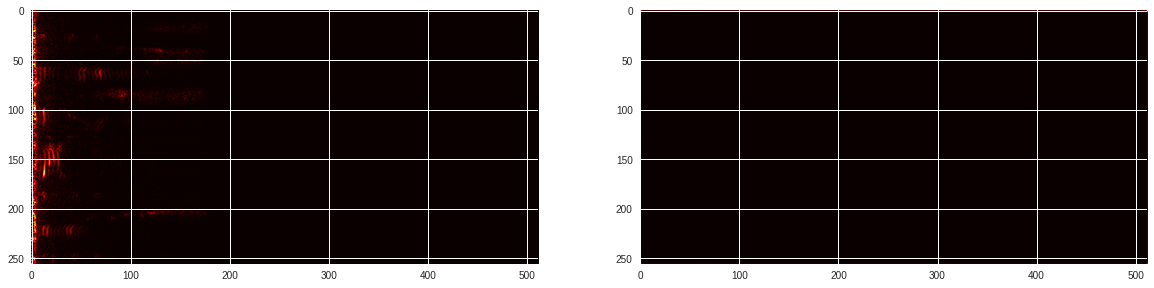

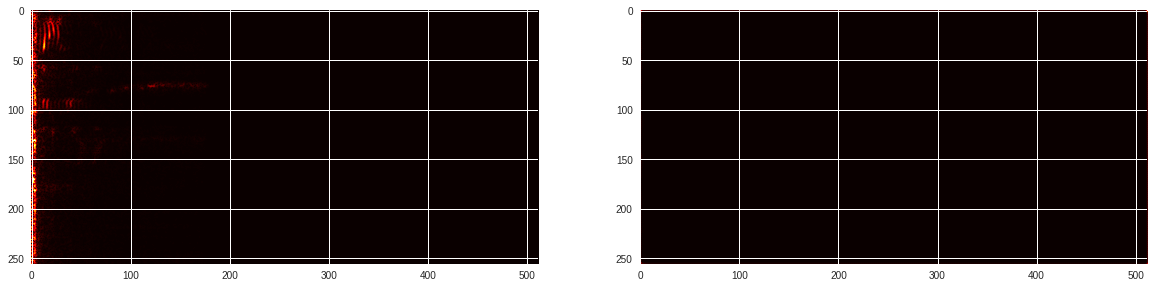

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

5:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(caps_deconv0)

#masked = Mask()(caps_deconv0)

_, H, W, C, A = seg_caps.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(seg_caps)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_37[0][0]                   
__________________________________________________________________________________________________
reshape_34 (Reshape)            (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_34[0][0]                 
__________________________________________________________________________________________________
caps_conv2

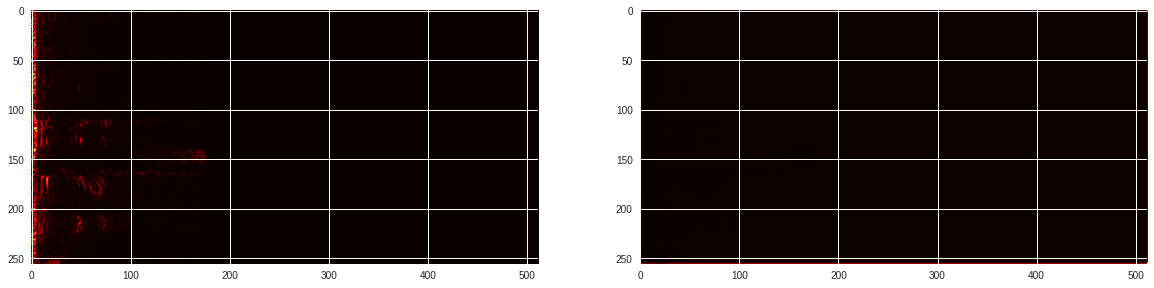

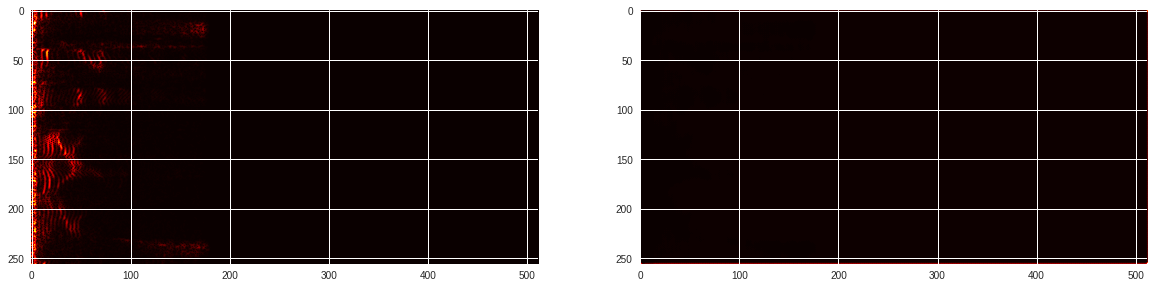

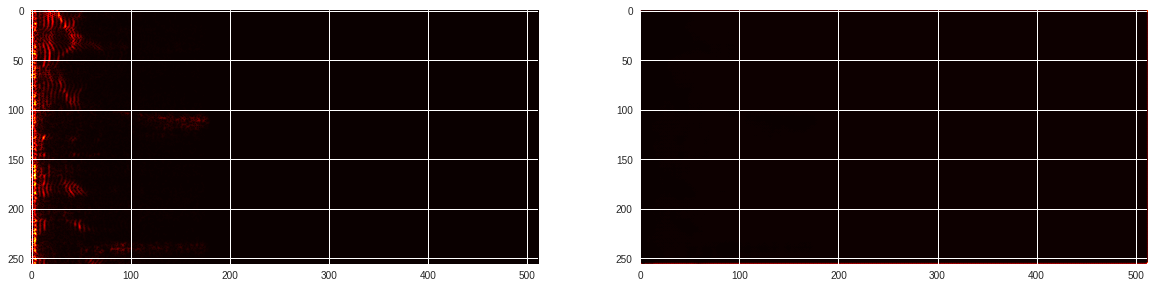

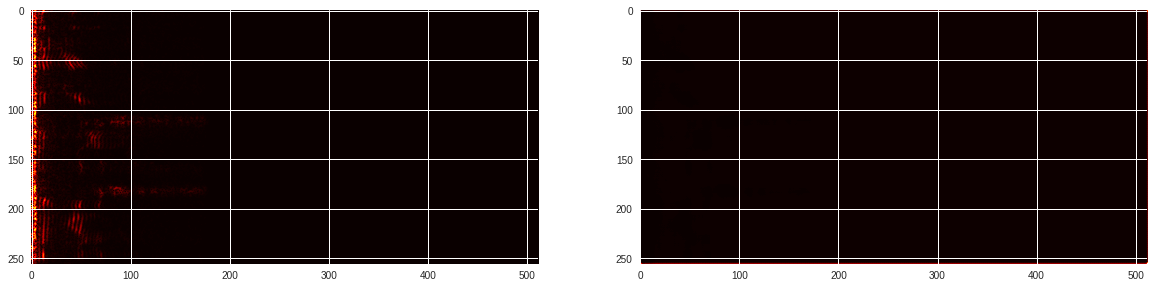

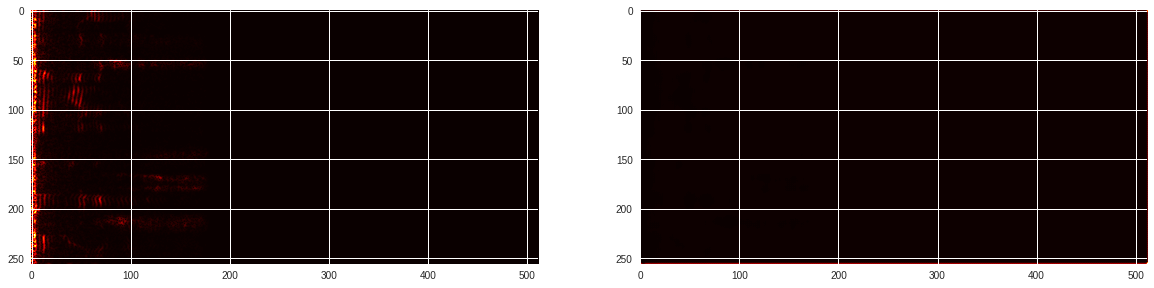

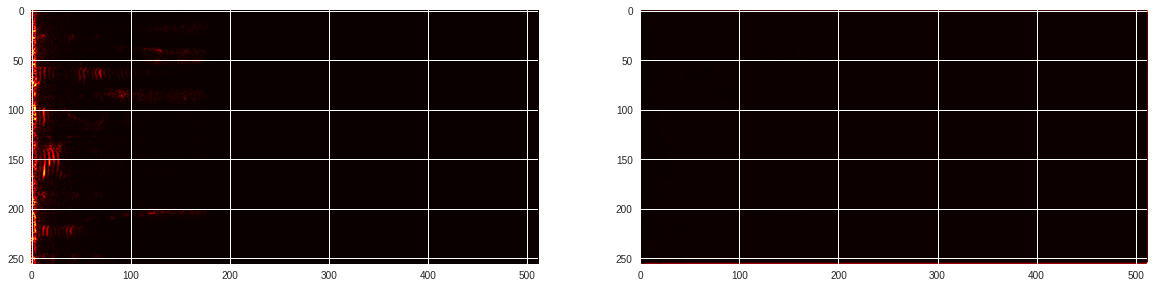

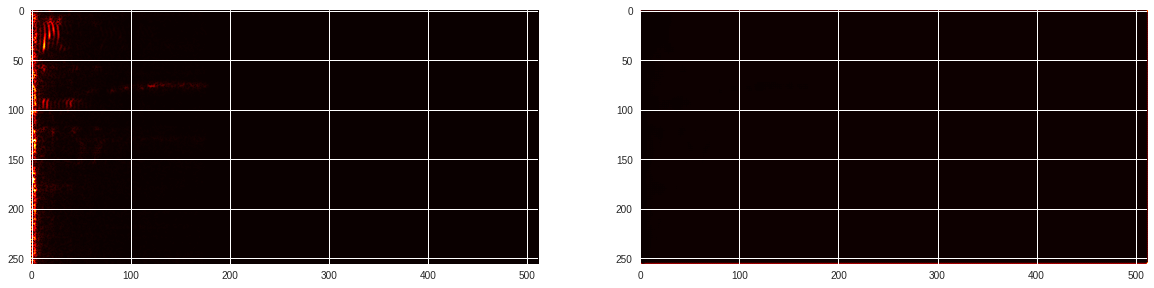

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

6:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(caps_deconv0)

masked = Mask()(seg_caps)

_, H, W, C, A = masked.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(masked)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_39[0][0]                   
__________________________________________________________________________________________________
reshape_36 (Reshape)            (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_36[0][0]                 
__________________________________________________________________________________________________
caps_conv2

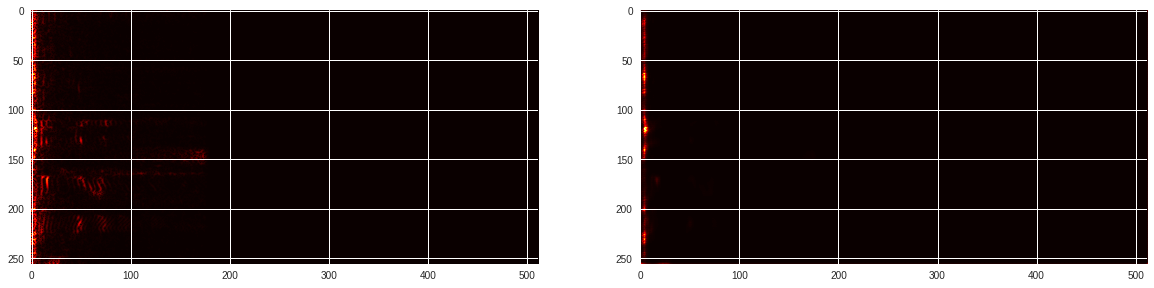

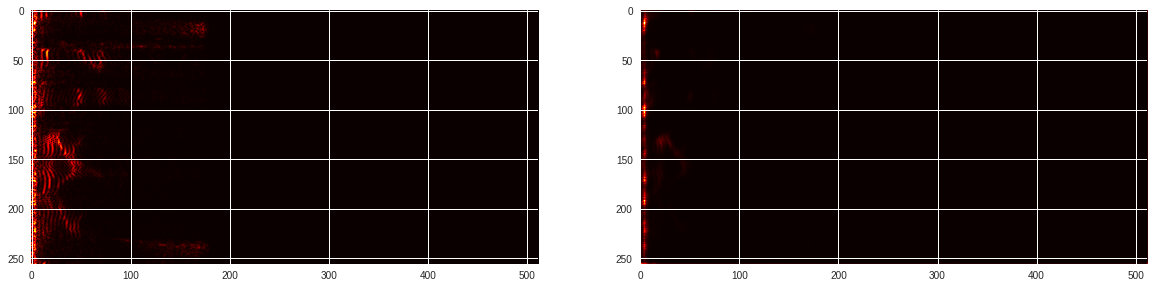

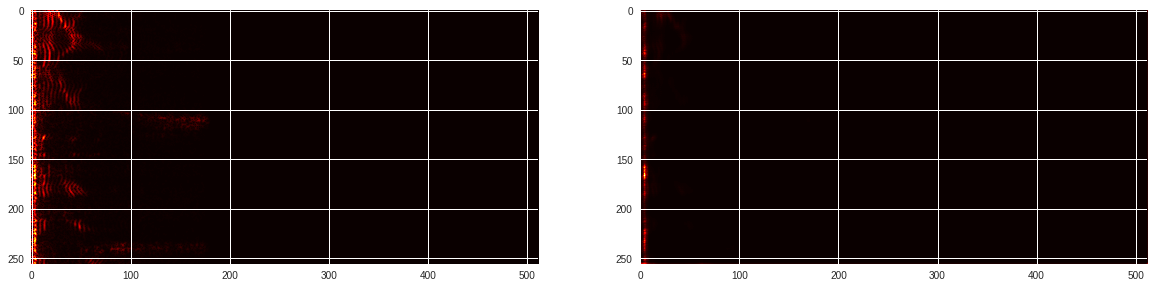

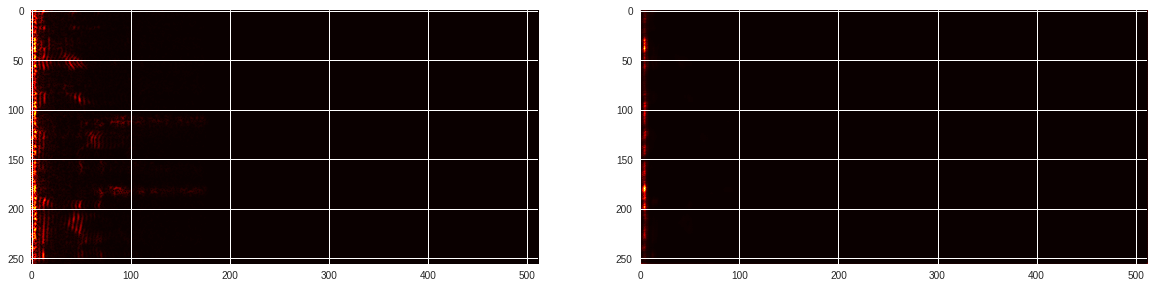

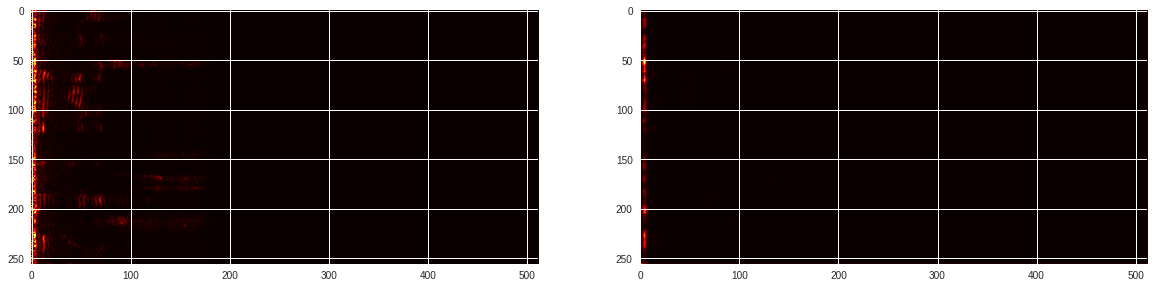

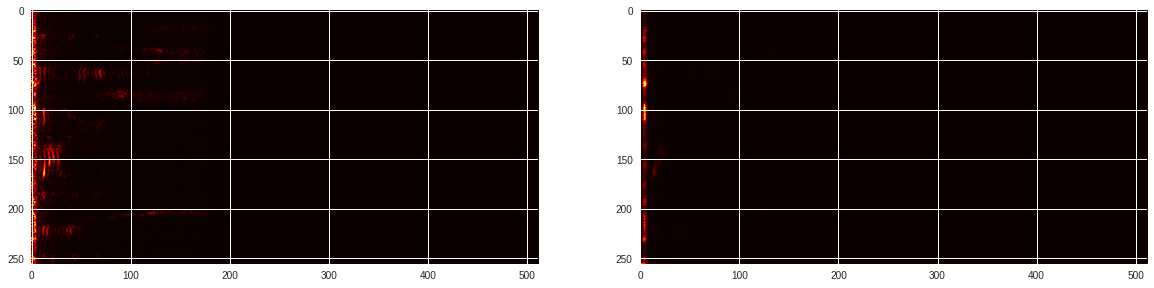

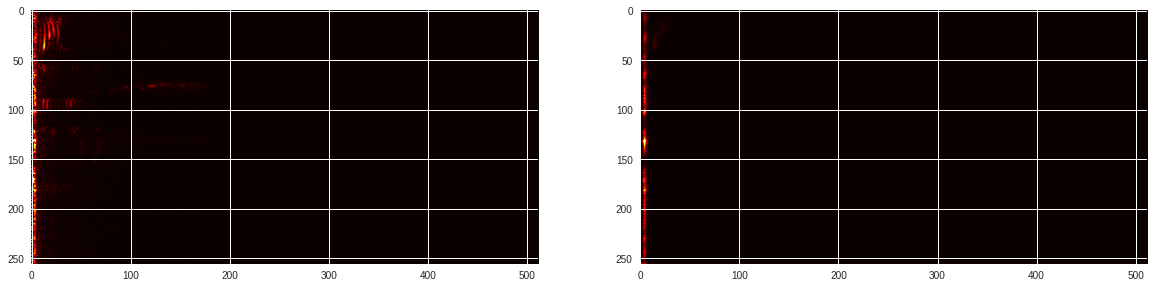

In [0]:
for i in range(spectrogram.shape[0]):#3 эпохи
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

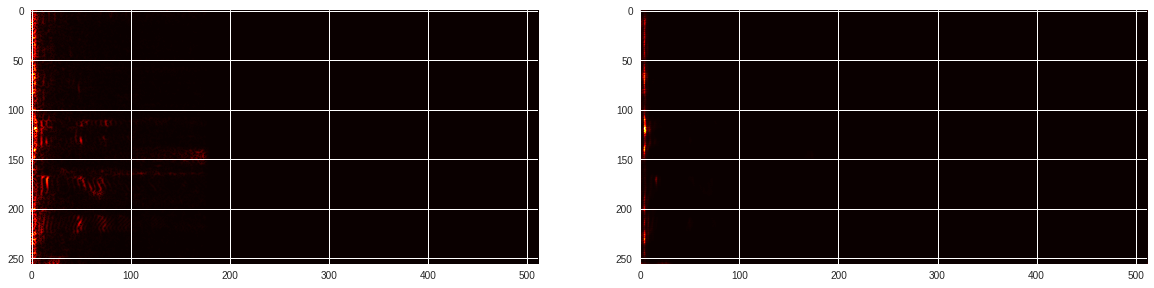

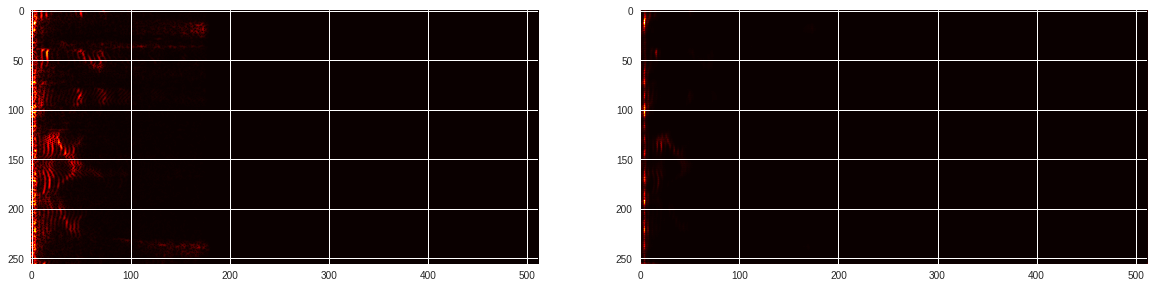

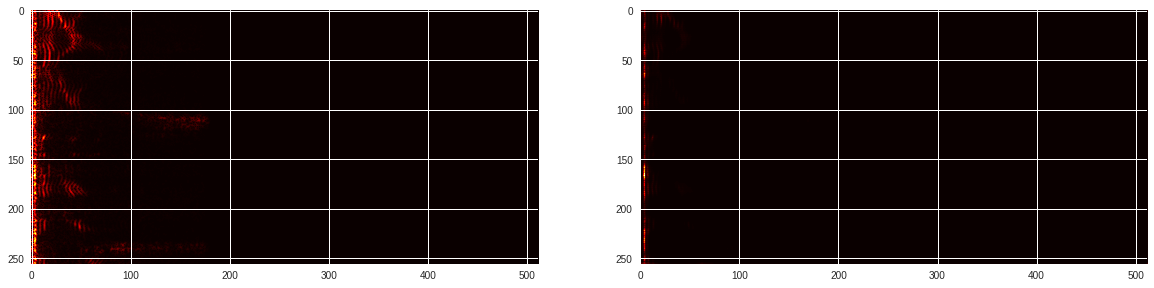

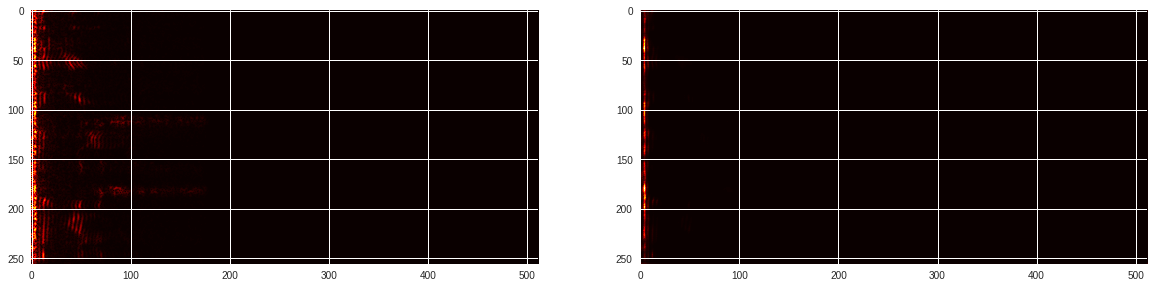

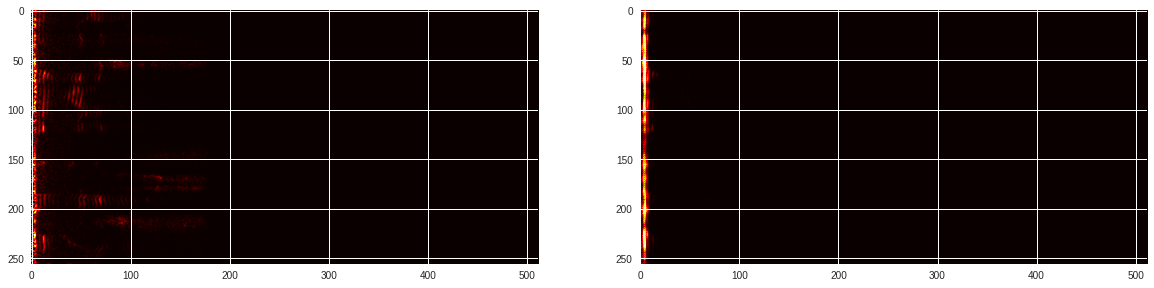

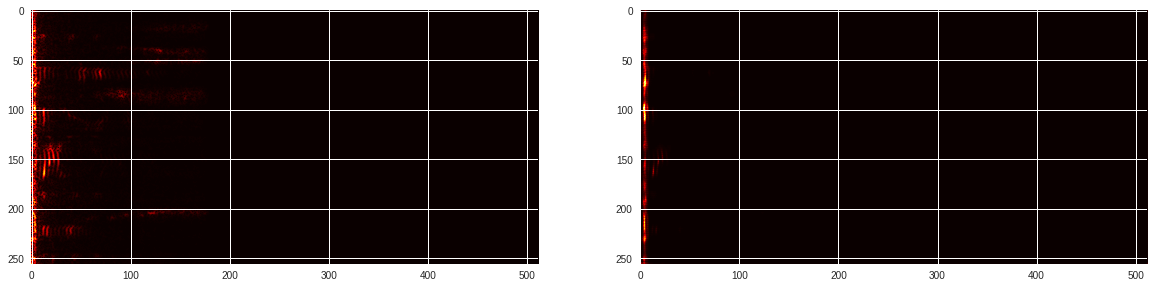

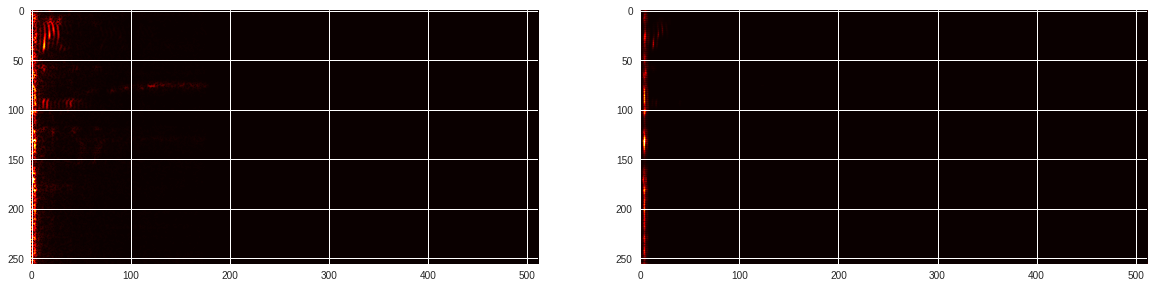

In [0]:
for i in range(spectrogram.shape[0]):#6
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

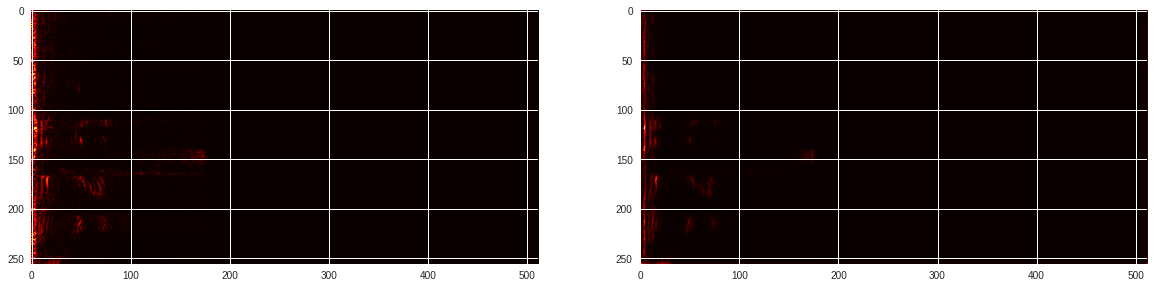

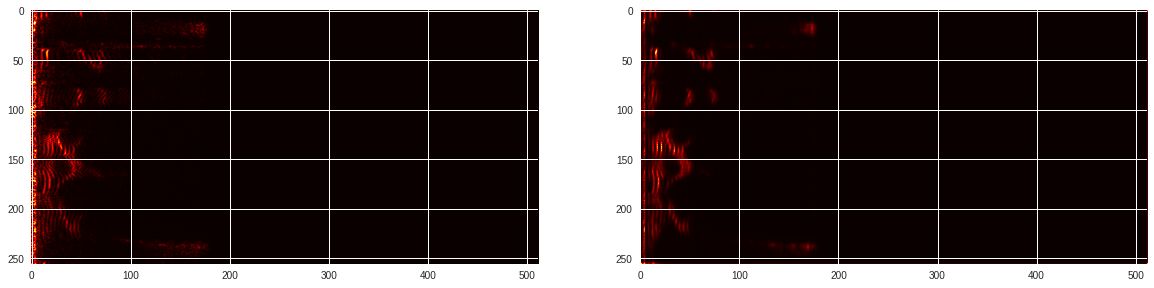

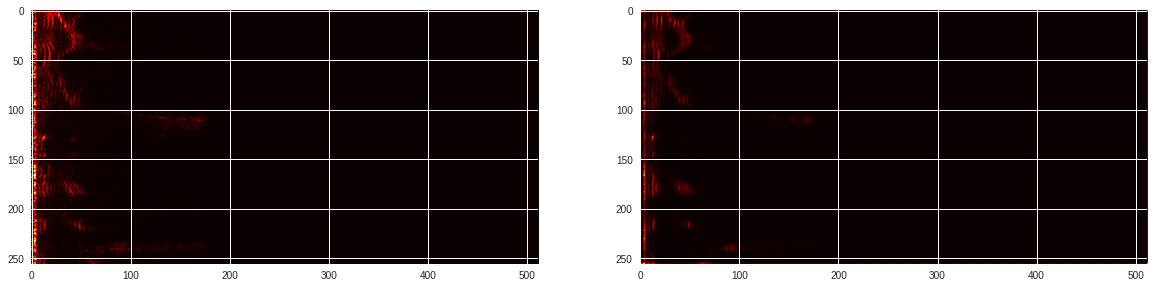

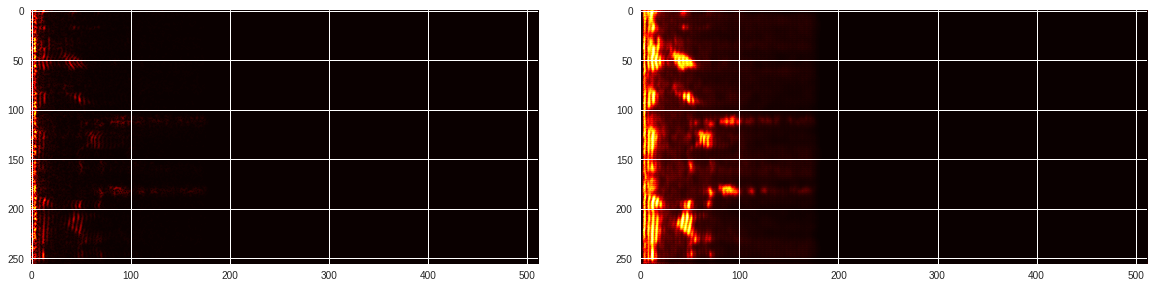

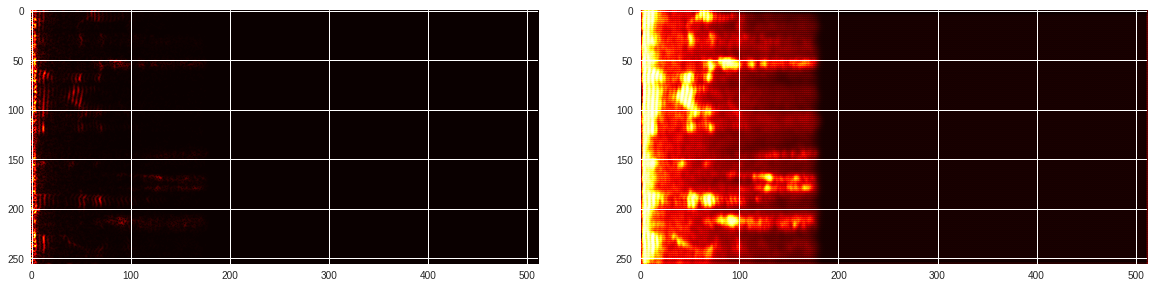

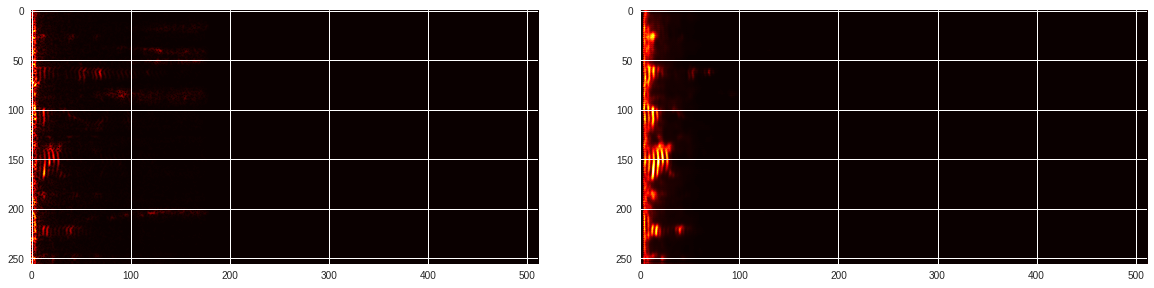

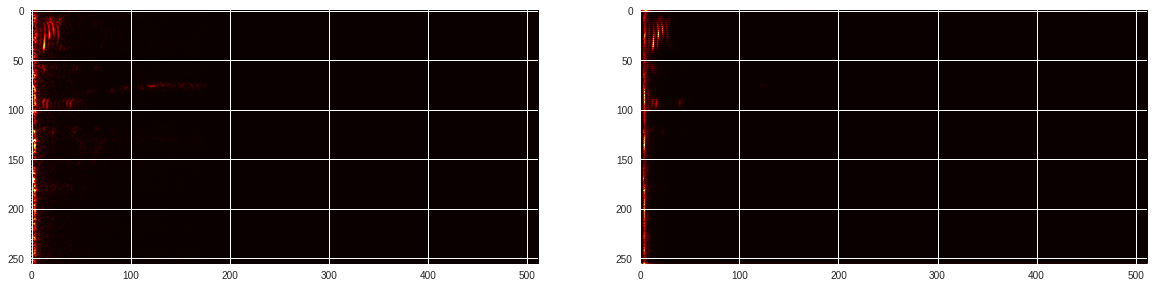

In [0]:
for i in range(spectrogram.shape[0]):#10
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

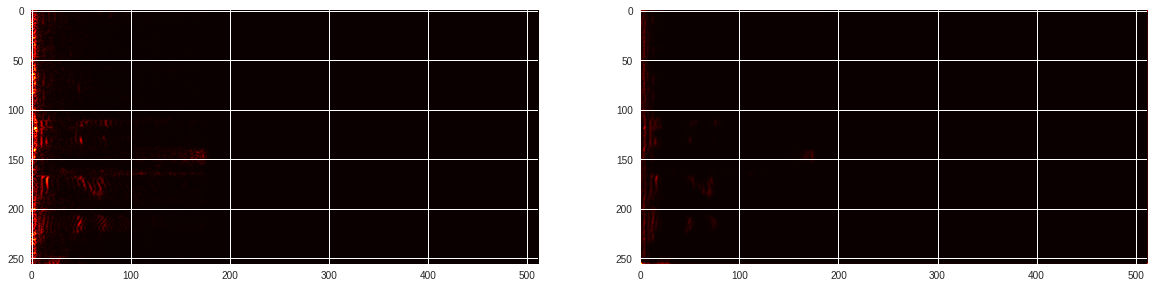

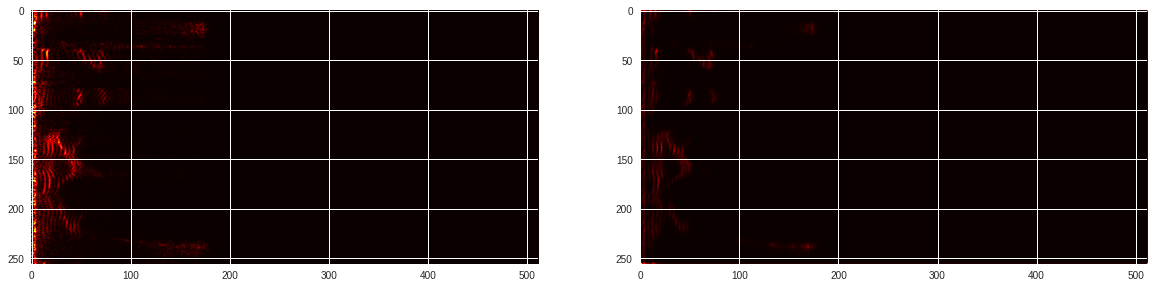

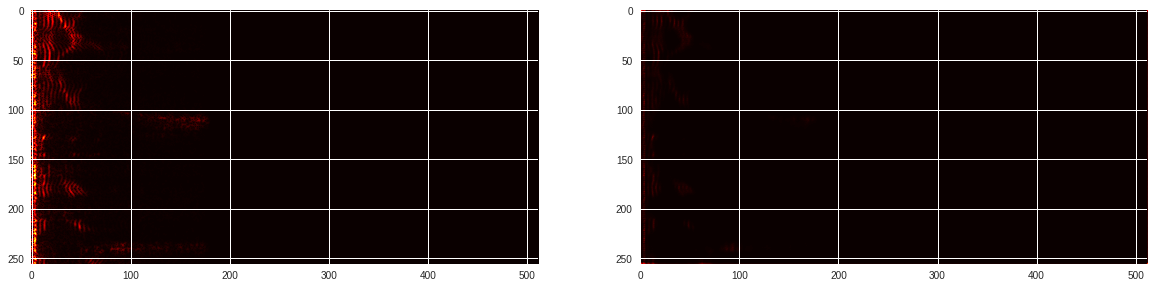

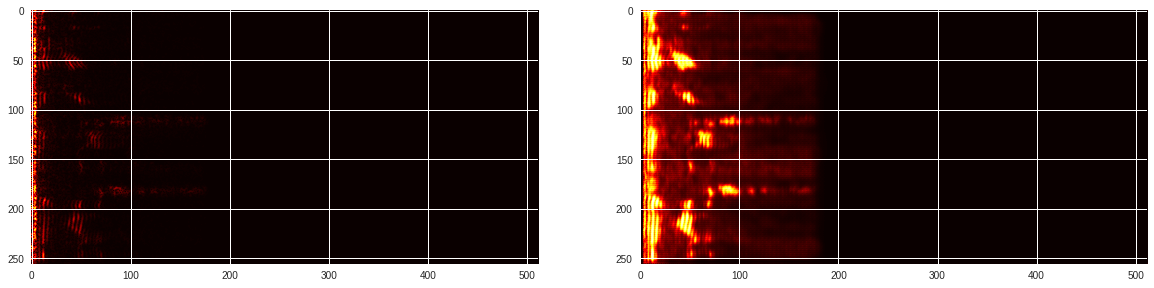

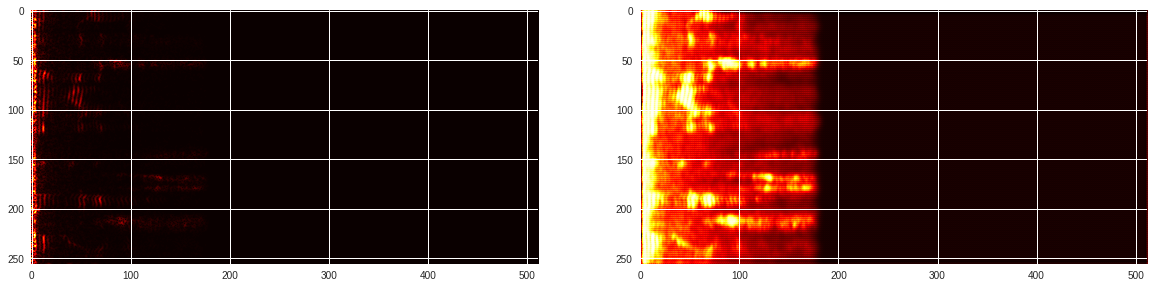

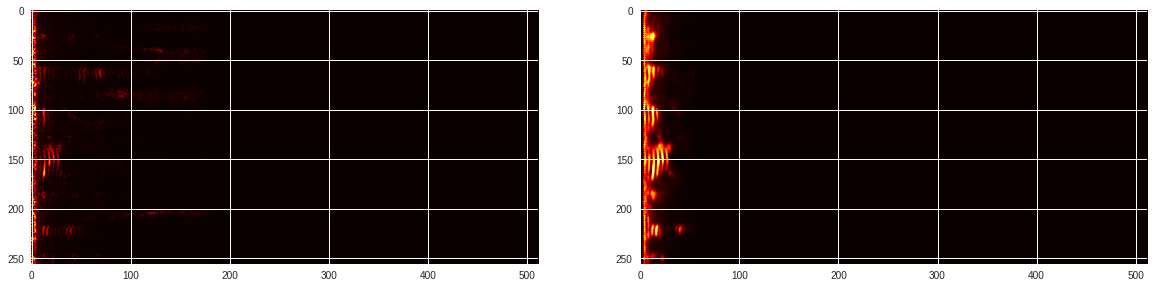

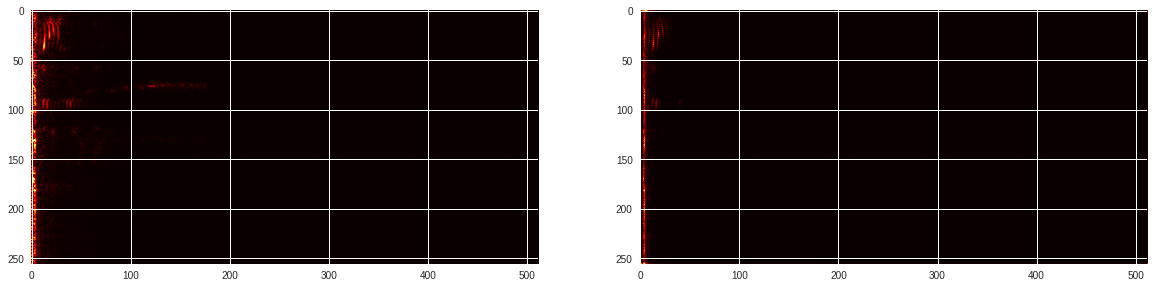

In [0]:
for i in range(spectrogram.shape[0]):#14
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

7:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=1, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=1, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=1, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=1, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=1, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=1, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=1,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=1,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=1,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=1,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=1,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=1,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=1, name='seg_caps')(caps_deconv0)

masked = Mask()(seg_caps)

_, H, W, C, A = masked.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(masked)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_2[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_3[0][0]                  
__________________________________________________________________________________________________
caps_conv2

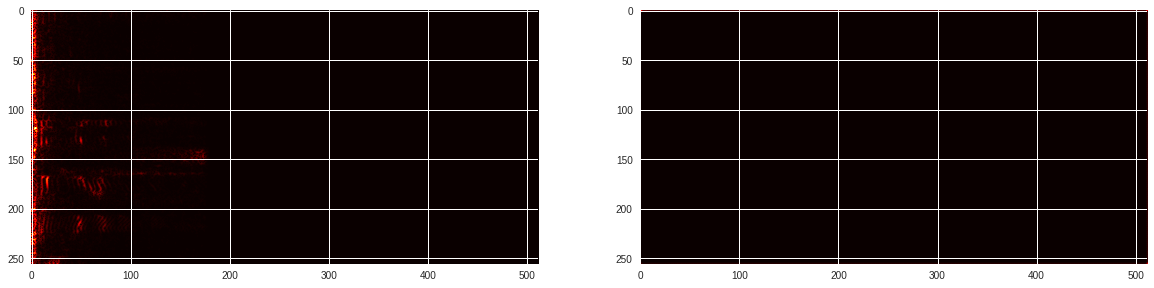

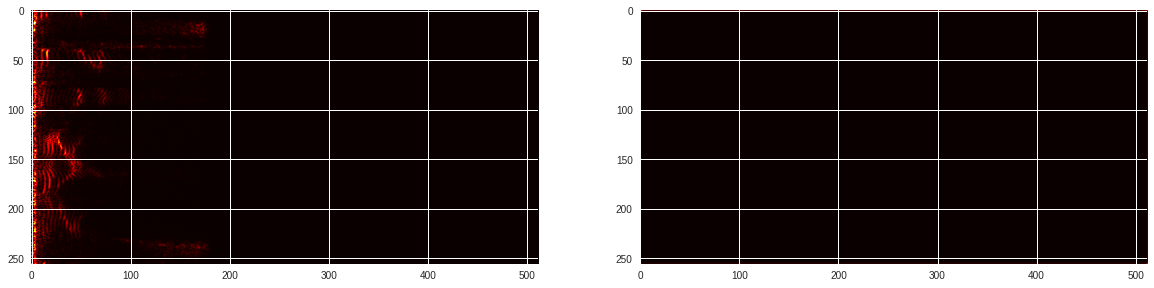

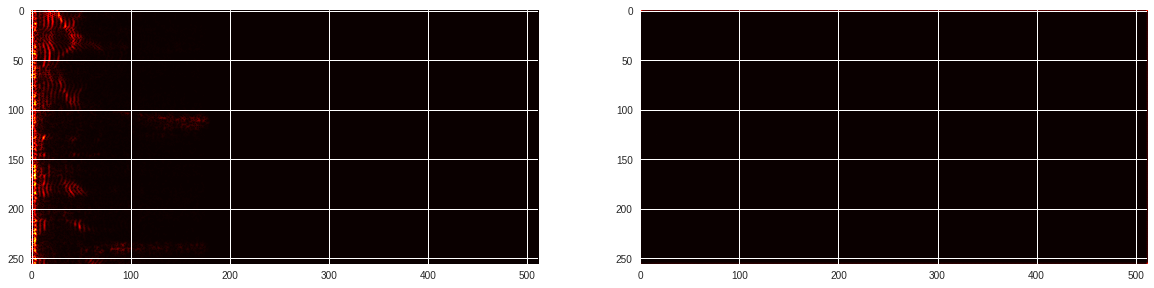

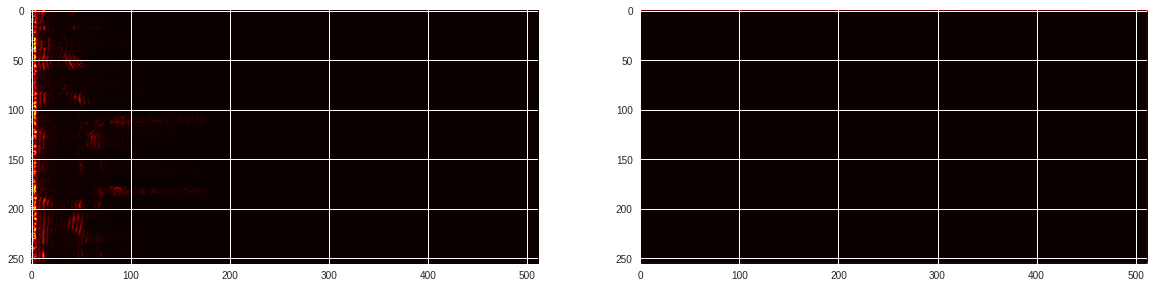

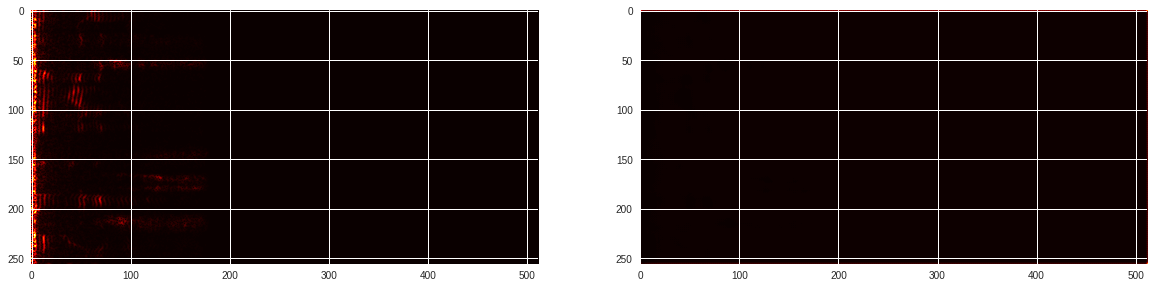

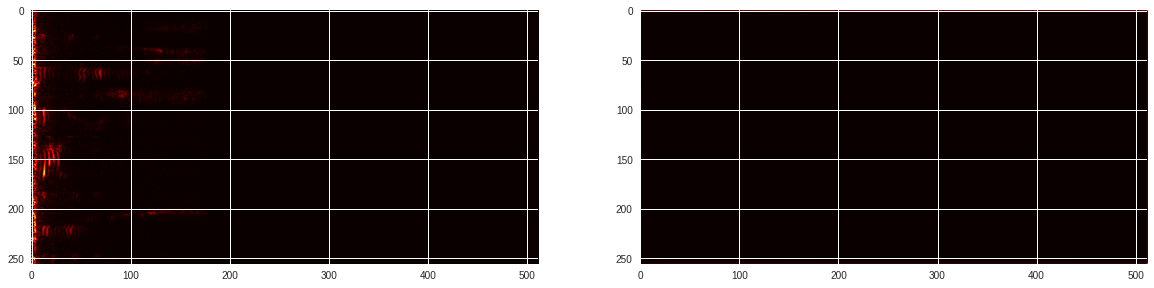

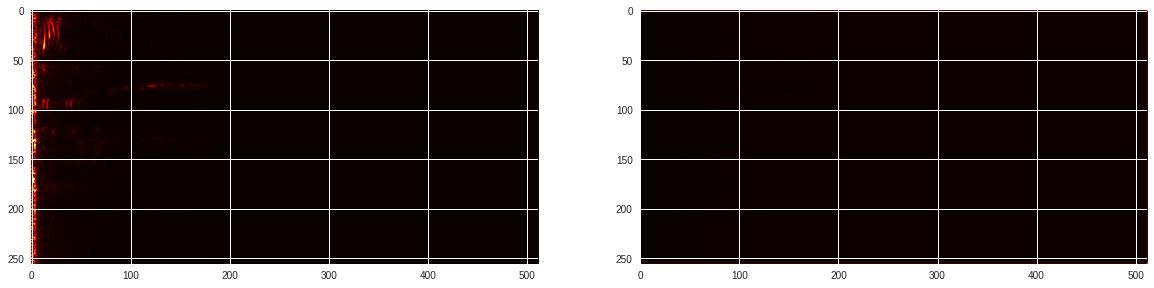

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

8:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(caps_deconv0)

masked = Mask()(seg_caps)

_, H, W, C, A = masked.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(masked)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Conv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_3[0][0]                    
__________________________________________________________________________________________________
reshape_5 (Reshape)             (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_5[0][0]                  
__________________________________________________________________________________________________
caps_conv2

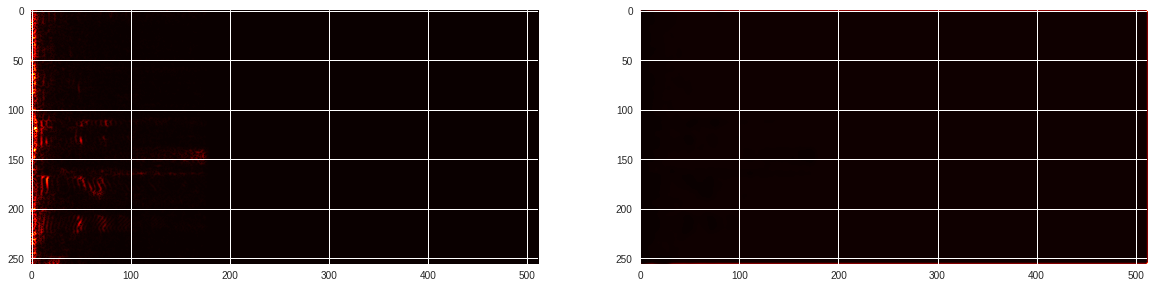

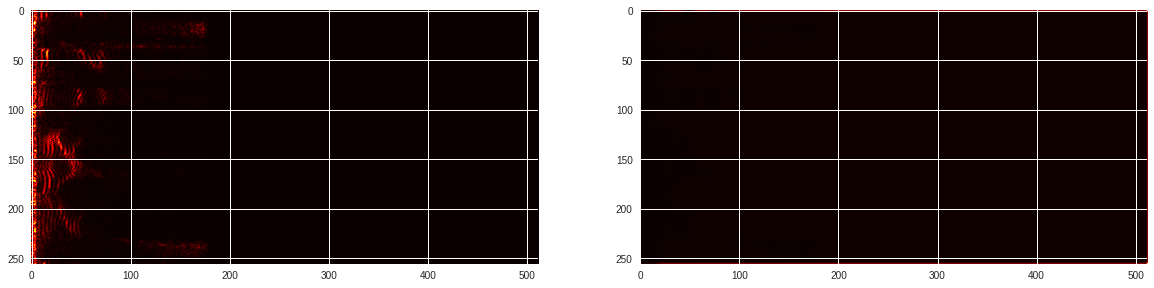

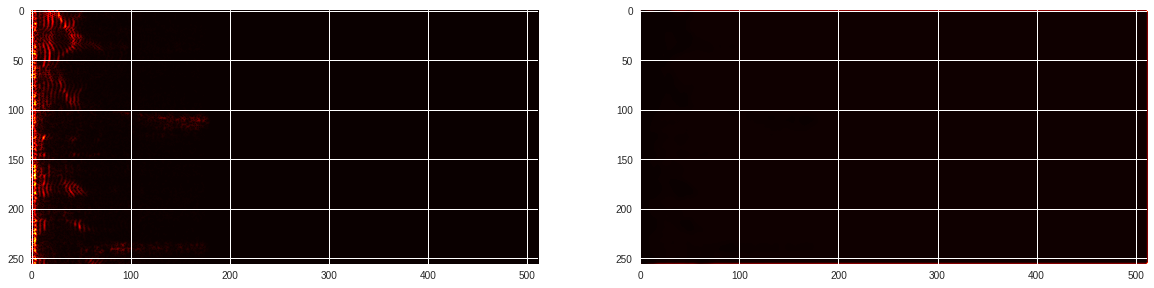

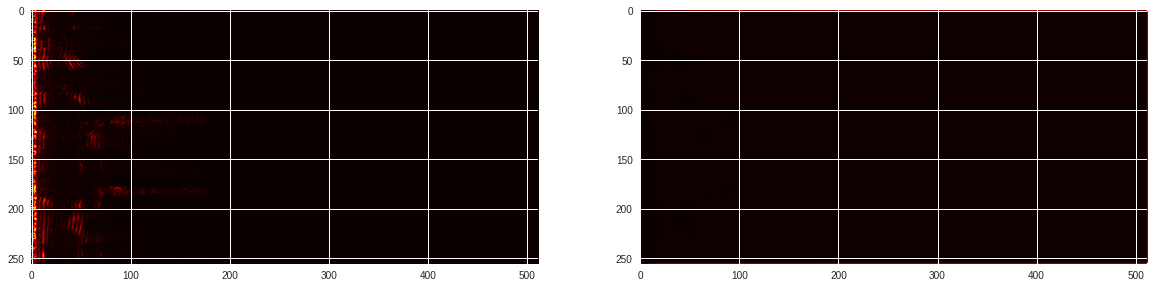

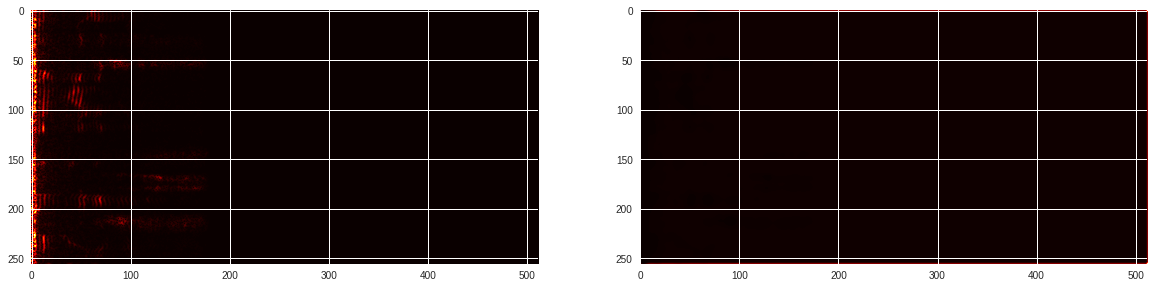

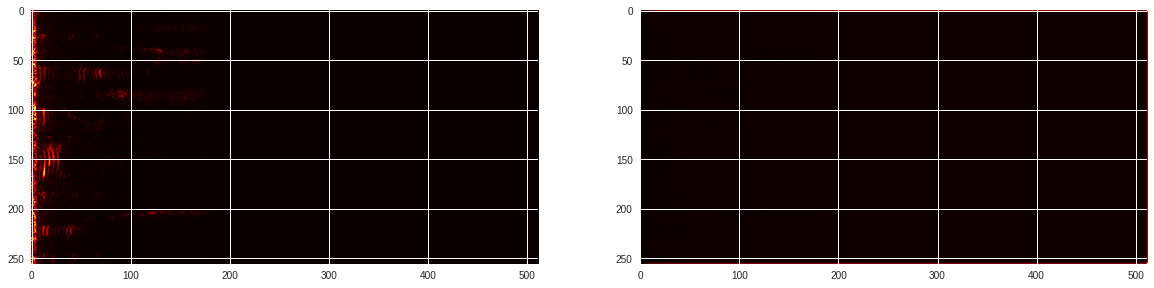

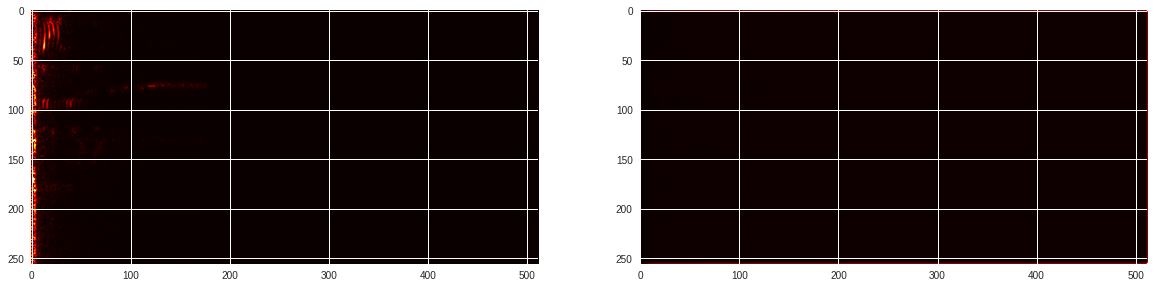

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

9:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', name='conv1')(x)
conv1 = LeakyReLU(alpha=0.2)(conv1)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(caps_deconv0)

masked = Mask()(seg_caps)

_, H, W, C, A = masked.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(masked)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

#model.summary()

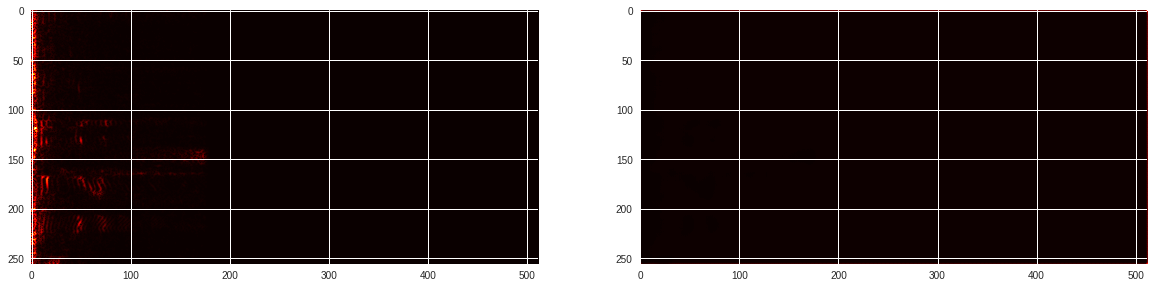

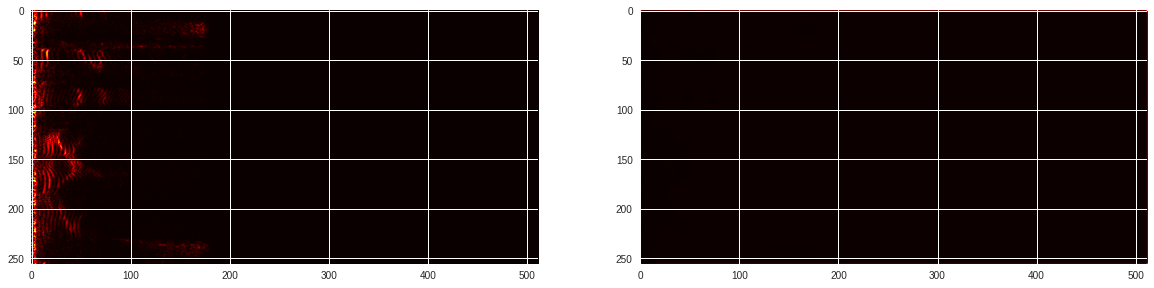

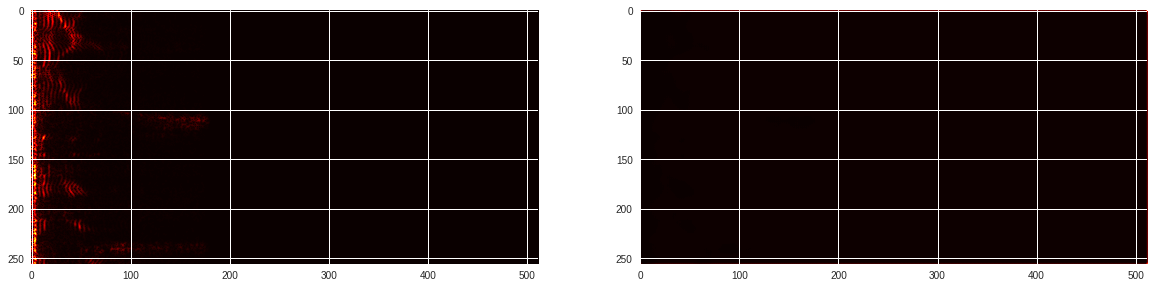

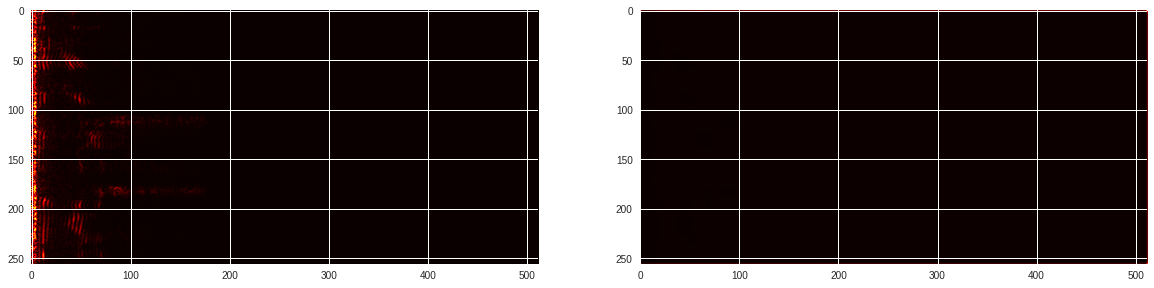

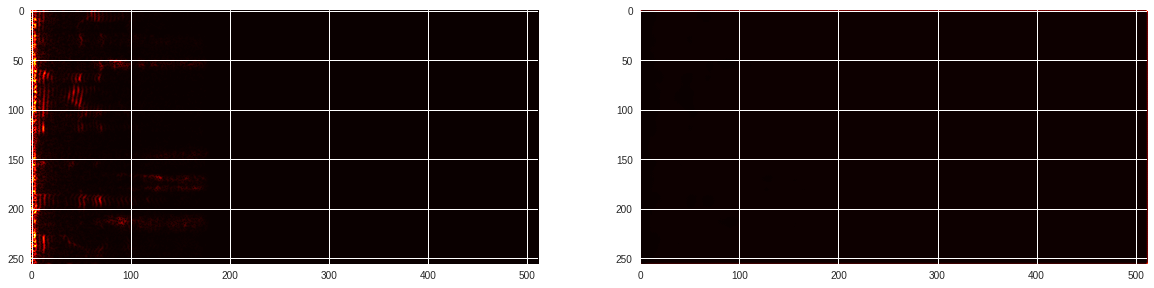

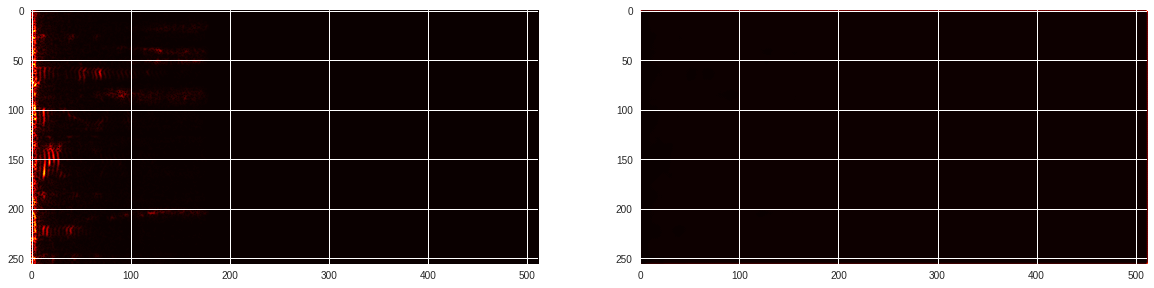

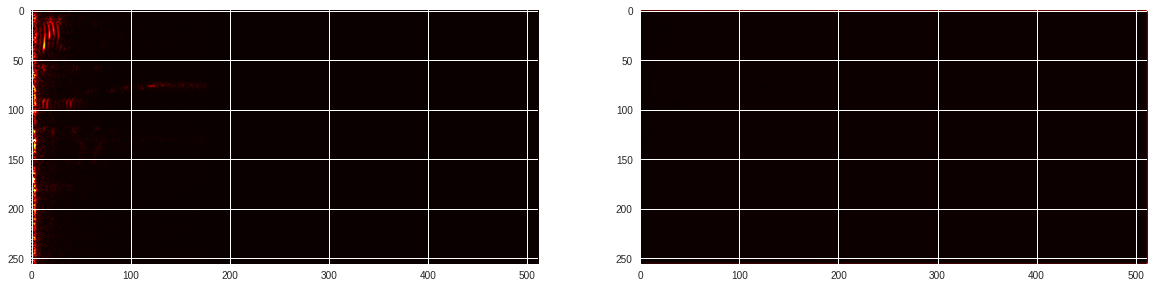

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

10:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=4, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=4, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=4, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(caps_deconv0)

masked = Mask()(seg_caps)

_, H, W, C, A = masked.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(masked)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

#model.summary()

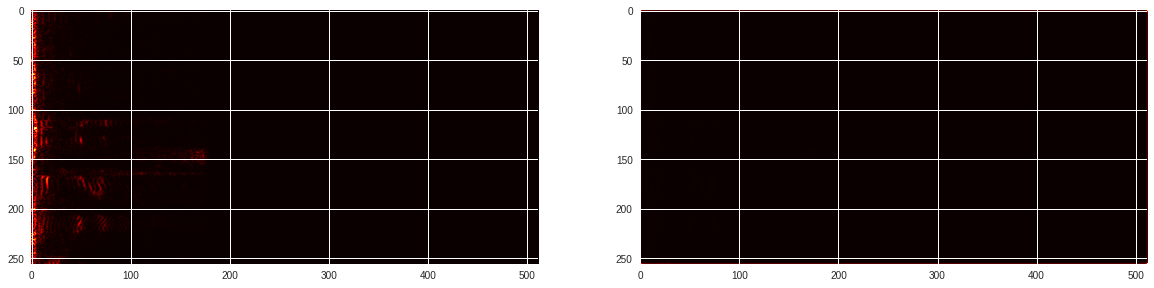

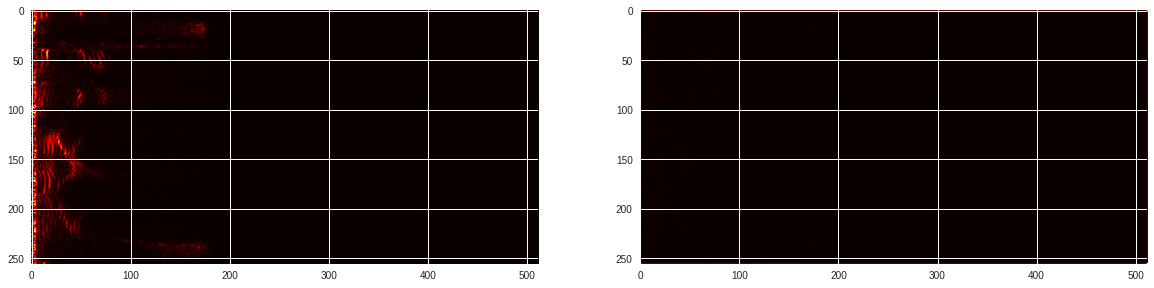

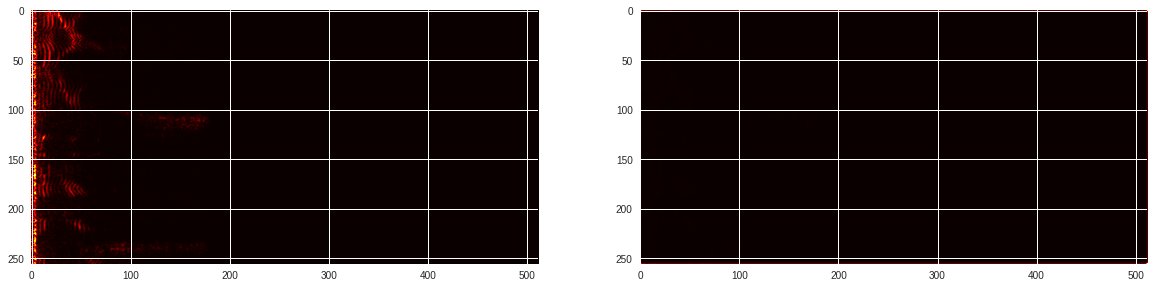

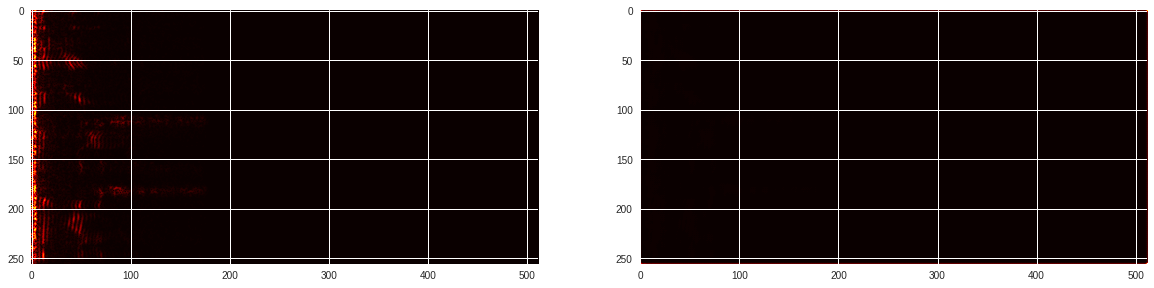

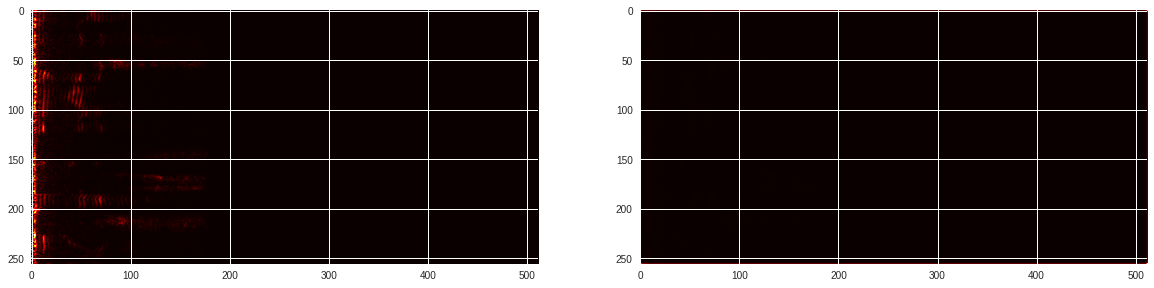

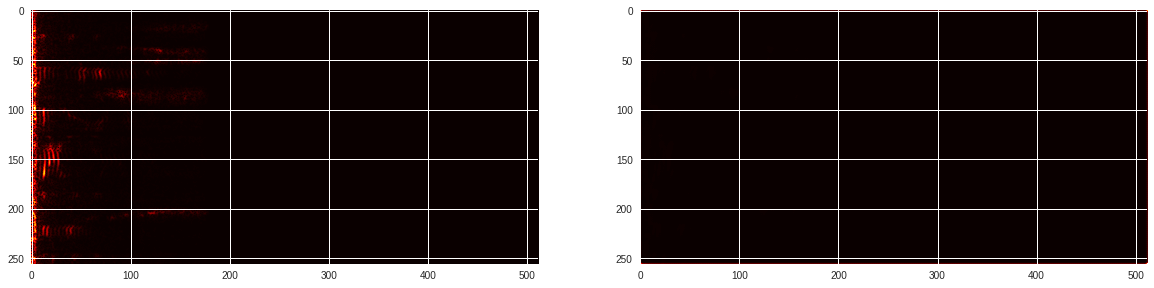

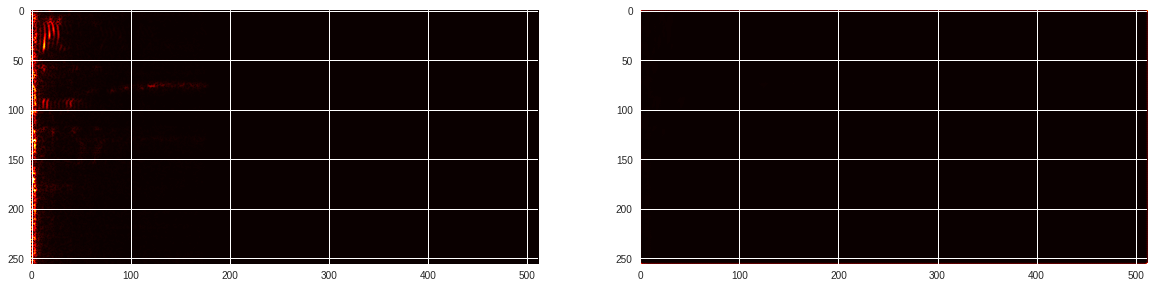

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])

11:

In [0]:
n_class=2

input_shape = (256, 512, 1)

x = layers.Input(shape=input_shape)

conv1 = layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', name='conv1')(x)

_, H, W, C = conv1.get_shape()
conv1_reshaped = layers.Reshape((H.value, W.value, 1, C.value))(conv1)

caps_conv1 = ConvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv1')(conv1_reshaped)

caps_conv2 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, strides=2, padding='same',
                                routings=3, name='caps_conv2')(caps_conv1)

caps_conv3 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, strides=2, padding='same',
                                routings=3, name='caps_conv3')(caps_conv2)

caps_conv4 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, strides=2, padding='same',
                                routings=3, name='caps_conv4')(caps_conv3)

caps_conv5 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, strides=2, padding='same',
                                routings=3, name='caps_conv5')(caps_conv4)

caps_conv6 = ConvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=256, strides=2, padding='same',
                                routings=3, name='caps_conv6')(caps_conv5)

caps_deconv5 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=128, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv5')(caps_conv6)

up4 = layers.Concatenate(axis=3, name='up4')([caps_deconv5, caps_conv5])
caps_deconv4 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=64, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv4')(up4)

up3 = layers.Concatenate(axis=3, name='up3')([caps_deconv4, caps_conv4])
caps_deconv3 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=32, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv3')(up3)

up2 = layers.Concatenate(axis=3, name='up2')([caps_deconv3, caps_conv3])
caps_deconv2 = DeconvCapsuleLayer(kernel_size=5, num_capsule=4, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv2')(up2)

up1 = layers.Concatenate(axis=3, name='up1')([caps_deconv2, caps_conv2])
caps_deconv1 = DeconvCapsuleLayer(kernel_size=5, num_capsule=2, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv1')(up1)

up0 = layers.Concatenate(axis=3, name='up0')([caps_deconv1, caps_conv1])
caps_deconv0 = DeconvCapsuleLayer(kernel_size=5, num_capsule=1, num_atoms=16, upsamp_type='deconv',
                                    scaling=2, padding='same', routings=3,
                                    name='caps_deconv0')(up0)

seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(caps_deconv0)

#masked = Mask()(caps_deconv0)

_, H, W, C, A = seg_caps.get_shape()
deconv1 = layers.Reshape((H.value, W.value, A.value))(seg_caps)

up = layers.Concatenate(axis=3, name='up')([deconv1, conv1])
deconv0 = layers.Deconv2D(filters=1, kernel_size=5, padding='same', kernel_initializer='he_normal',
                              activation='sigmoid', name='deconv0')(up)


# Layer 4: Convolutional Capsule: 1x1
seg_caps = ConvCapsuleLayer(kernel_size=1, num_capsule=1, num_atoms=16, strides=1, padding='same',
                            routings=3, name='seg_caps')(up_3)

# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
out_seg = Length(num_classes=n_class, seg=True, name='out_seg')(caps_deconv0)

# Decoder network.
_, H, W, C, A = seg_caps.get_shape()
y = layers.Input(shape=input_shape[:-1]+(1,))
masked_by_y = Mask()([seg_caps, y])  # The true label is used to mask the output of capsule layer. For training
masked = Mask()(seg_caps)  # Mask using the capsule with maximal length. For prediction


model = models.Model(inputs=x, outputs=deconv0)


model.compile(optimizer=Adam(1e-4), loss='mean_absolute_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 512, 16) 416         input_20[0][0]                   
__________________________________________________________________________________________________
reshape_31 (Reshape)            (None, 256, 512, 1,  0           conv1[0][0]                      
__________________________________________________________________________________________________
caps_conv1 (ConvCapsuleLayer)   (None, 128, 256, 2,  12832       reshape_31[0][0]                 
__________________________________________________________________________________________________
caps_conv2

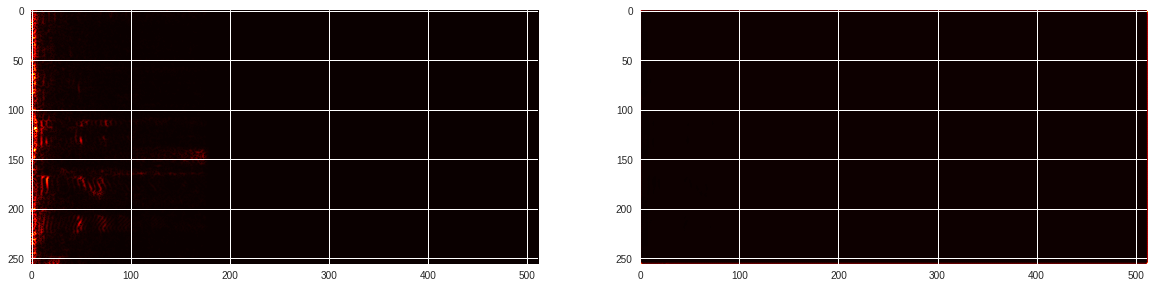

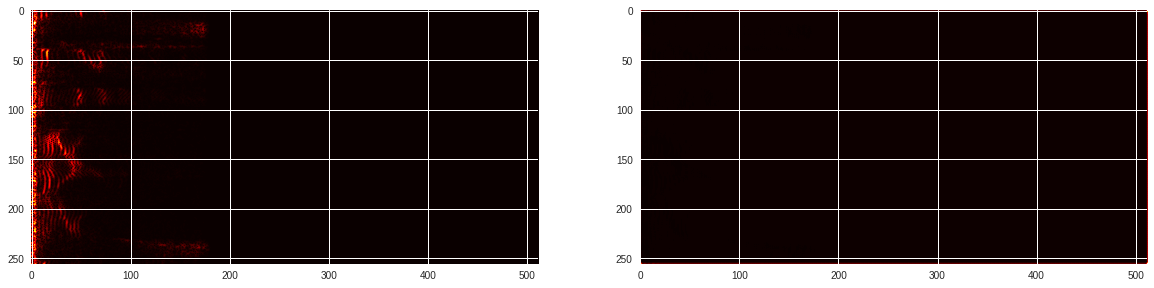

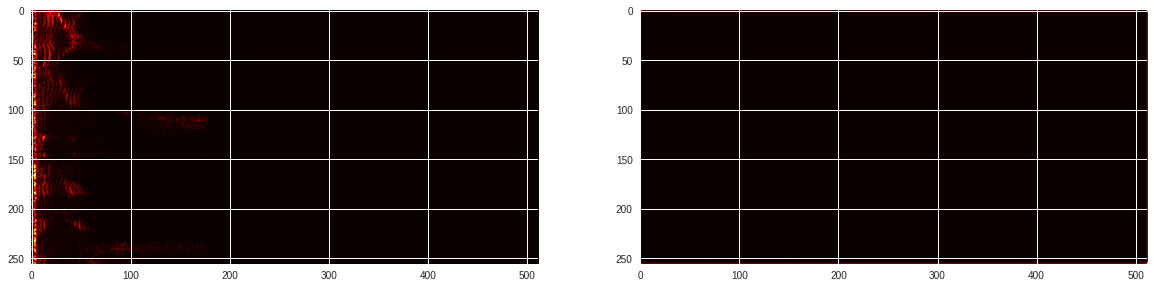

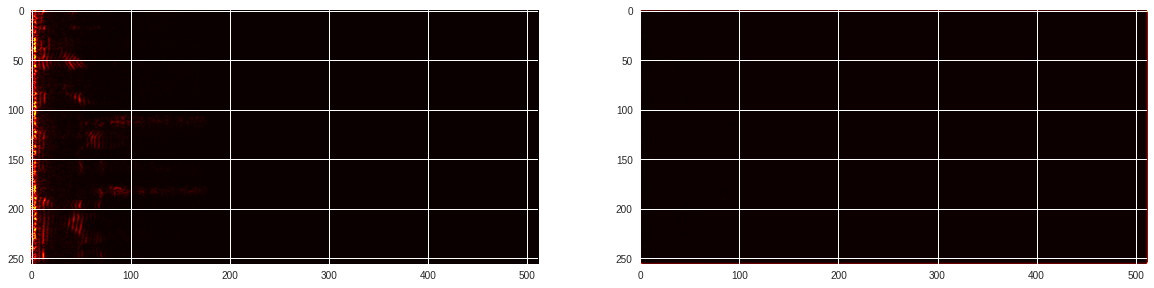

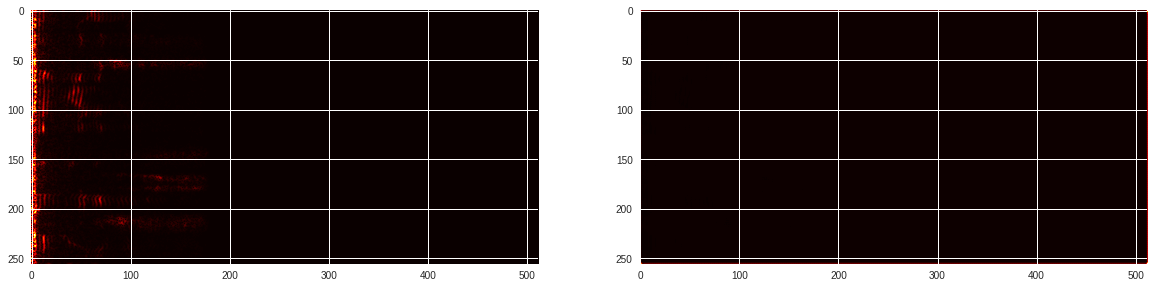

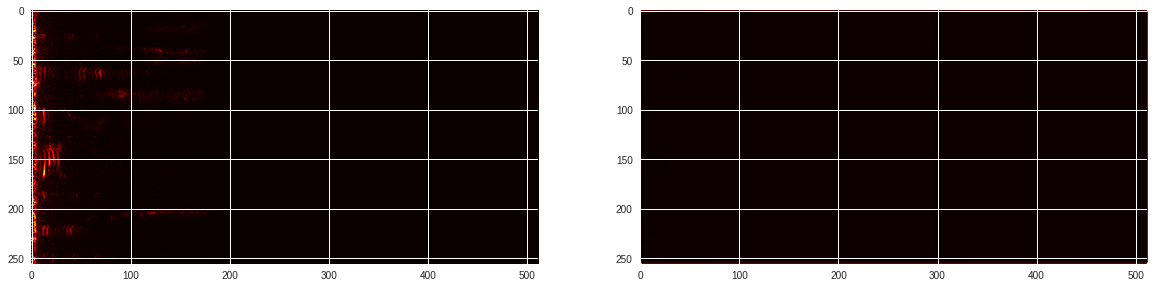

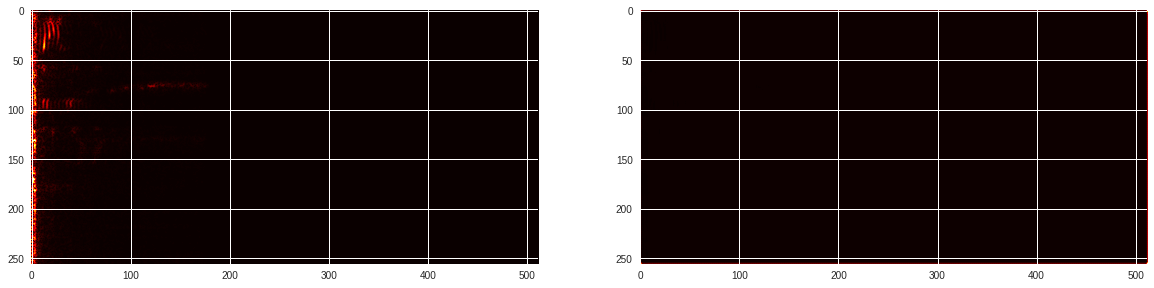

In [0]:
for i in range(spectrogram.shape[0]):
    fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(20,20))
    ax1.imshow(spectrogram[i, :, :, 0])
    ax2.imshow(voice_spec_pred[i, :, :, 0])